# Generating DRMI Lock States Plots

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick
import pandas as pd
%matplotlib inline

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Using JSON File to plot 5 months of data

Downloading data from gwpy_dump as hdf5 files, calculating durations and saving values to json file.

In [2]:
with open('durations_aug-jan.json', 'r') as f:
    dictionary = json.load(f)

In [3]:
dur_fail = dictionary['dur_fail']
dur_suc = dictionary['dur_suc']
time = dictionary['time']

In [4]:
nan = None
dur_subset = dur_suc[0:100]
time_subset = time[0:100]
xvals = range(0, 100)
xvals_full = range(0, len(dur_suc))

In [5]:
time_int = []
for t in time_subset:
    t = int(t)
    time_int.append(t)

In [6]:
gpstime = [int(t) for t in time]

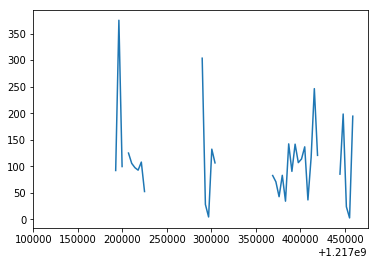

In [7]:
plt.plot(time_int, dur_subset)

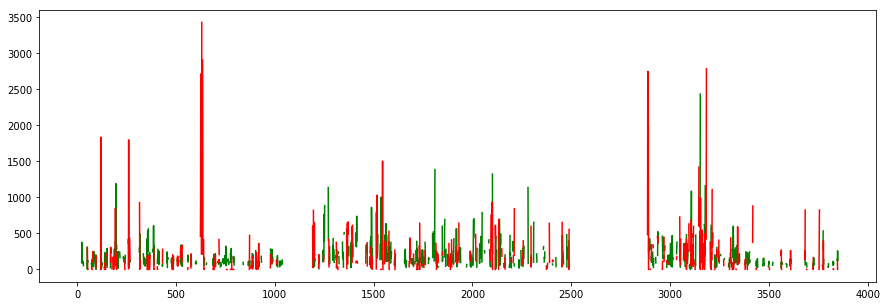

In [8]:
plt.figure(figsize=(15,5))
plt.plot(xvals_full, dur_suc, color='g')
plt.plot(xvals_full, dur_fail, color='r')

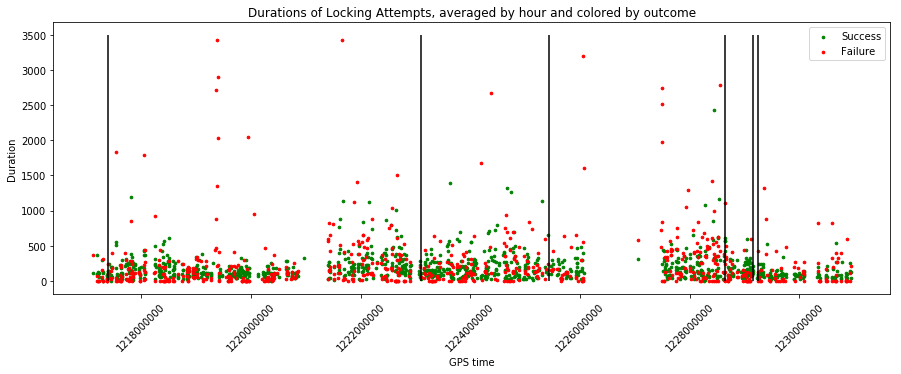

In [9]:
plt.figure(figsize=(15,5))
plt.scatter(gpstime, dur_suc, color='g', label='Success', s=7)
plt.scatter(gpstime, dur_fail, color='r', label='Failure', s=7)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
plt.title('Durations of Locking Attempts, averaged by hour and colored by outcome')
plt.xlabel('GPS time')
plt.ylabel('Duration')
#plt.ylim(0,1000)
#plt.xlim(1228000000, 1228084600)
plt.vlines(1217400000, 0, 3500)
plt.vlines(1225440018, 0, 3500)
plt.vlines(1228633818, 0, 3500)
plt.vlines(1229155218, 0, 3500)
plt.vlines(1229241618, 0, 3500)
plt.vlines(1223100000, 0, 3500)
ax.legend()

Removing nan and saving the durations and gpstimes to lists

In [50]:
dur_fail = dictionary['dur_fail']
dur_suc = dictionary['dur_suc']
time = dictionary['time']
gpstime = [int(t) for t in time]
dur_suc = np.array(dur_suc)
gpstime = np.array(gpstime)

In [51]:
idx_nan = np.isnan(dur_suc)
idx_notnan = np.where(idx_nan == False)[0]
durations = dur_suc[idx_notnan]
times = gpstime[idx_notnan]

In [56]:
times_and_durs = pd.DataFrame({'gpstime': times,
                              'duration': durations})
times_and_durs.to_csv('time_and_duration_successes.csv', encoding='utf-8', index=False)

## Using HDF5 Files

Downloading data from DVweb and using h5py to plot it:

In [5]:
f = h5py.File('H1_GRD_ISC_DRMI_STATE_N-1178236818-3600.h5', 'r+')

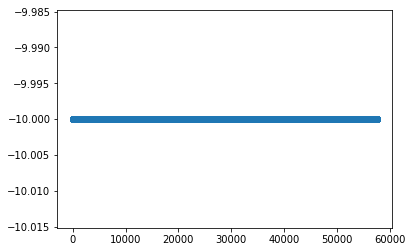

In [7]:
time = range(0,57600)
data = f[u'1178236818-3600']['H1:GRD-ISC_DRMI_STATE_N,raw'].value
plt.scatter(time, data)
#plt.savefig("DRMI_Plot.png")

In [38]:
file = h5py.File('1217894400__1217980800__H1..GRD-ISC_LOCK_STATE_N.hdf5', 'r')

In [52]:
d = list(file.keys())[0]
print(d)

H1:GRD-ISC_LOCK_STATE_N


In [58]:
print(file[d])

<HDF5 dataset "H1:GRD-ISC_LOCK_STATE_N": shape (1382400,), type "<f4">


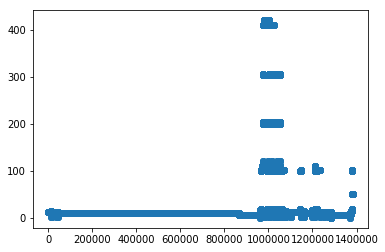

In [36]:
data = file['H1:GRD-ISC_LOCK_STATE_N'].value
time=range(0,len(data))
plt.scatter(time, data)

In [70]:
num = 1
dur = []
out = []

size=len(data)-2
for idx in range(0,size): 
    val1 = data[idx]
    val2 = data[idx +1]
    if val1 == 101 and val2 == 101:
        num += 1
    elif val1 == 101 and val2 == 102:
        num = float(num)
        time = num/float(16)
        dur.append(time)
        out.append(1)
        num = 1
    elif val1 == 101 and val2<val1:
        num = float(num)
        time = num/float(16)
        dur.append(time)
        out.append(0)
        num = 1
print(dur)
print(out)

[160.3125, 70.125, 292.6875, 169.25, 92.3125, 154.9375, 108.8125, 129.0, 24.0, 0.1875, 70.0625, 0.1875, 86.0625]
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]


In [57]:
print(np.mean(dur))

104.45673076923077


In [68]:
durfi = np.where([i == 0 for i in out])[0]
print(durfi)
print(np.array(dur))
np.array(dur)[durfi]

[ 6  7  9 11 12]
[1.603125e+02 7.012500e+01 2.926875e+02 1.692500e+02 9.231250e+01
 1.549375e+02 1.088125e+02 1.290000e+02 2.400000e+01 1.875000e-01
 7.006250e+01 1.875000e-01 8.606250e+01]


array([108.8125, 129.    ,   0.1875,   0.1875,  86.0625])

In [71]:
dur = np.array(dur)
durfi = np.where([i == 0 for i in out])[0]
durf = dur[durfi]
dursi = np.where([i == 1 for i in out])[0]
durs = dur[dursi]

print(durs)
print(durf)

[160.3125  70.125  292.6875 169.25    92.3125 154.9375  24.      70.0625]
[108.8125 129.       0.1875   0.1875  86.0625]


## Using nds_query

Running the following in terminal: 

    export GPSTIME=1178263818
    export NUM_SEC=36000
    export CHANNEL="H1:GRD-ISC_DRMI_STATE_N"
    nds_query -n nds.ligo.caltech.edu -s $GPSTIME  -d $NUM_SEC   -v "$CHANNEL" | ./get_vals > DRMI_values_1178263818-36000.tex
    
Using the output text file below to generate plot: 

In [43]:
f = open('DRMI_values_1178263818-36000.tex')
yourList = f.readlines()

In [44]:
orders = []
for each_line in yourList:
    order = each_line.replace("\n", "").strip()
    order = int(order)
    orders.append(order)
#print(orders) #keep this line commented for large datasets

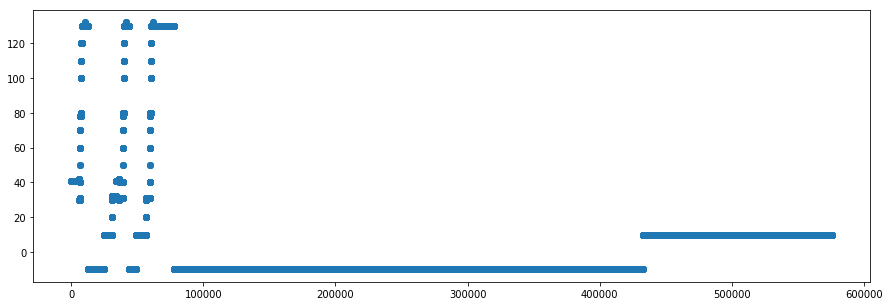

In [86]:
times = range(0,576000)
plt.figure(figsize=(15,5))
plt.scatter(times,orders)
#plt.xlim(0,100000)

## Measuring what percent of the time the state goes up or down

- Dictionary that defines number = type of state
- iterate through the list, see how many times it goes to a state thats a higher number vs lower number, take the percent it went up
- print out the type of state and percent it increased, decreased, or succeeded in locking

In [70]:
inverse_dictionary = {0:'Init', -11:'Lockloss', -10:'Idle', 10:'Down', 20:'Set DRMI', 30:'Lock DRMI 1f', 31:'31 state' \
    , 32:'32 state', 40:'40 state', 41:'41 state', 42:'42 state' \
    , 50:'50 state', 60:'60 state',   70:'DRMI WFS centering', 78:'Prep DRMI ASC' \
    , 80:'80 state',   100:'DRMI 1f locked ASC', 110:'Zero 3f offsets', 120:'Transition to 3f' \
    , 130:'DRMI 3f locked', 131:'131 state', 132:'132 state'}


In [66]:
for idx in range(0,100000):
    value = orders[idx]
    nextidx = idx + 1
    nextvalue = orders[nextidx]
    nextnextidx = idx + 2
    nextnextvalue = orders[nextnextidx]
    if value != -10 and nextvalue == -10:
        print("success at", value)
    elif value == -10 and nextvalue != -10:
        print ("failure: lost lock to", nextvalue)
    elif value < nextvalue:
        print("increase from", value, "to", nextvalue)
    elif value > nextvalue:
        print("decrease from", value, "to", nextvalue)

increase from 41 to 42
decrease from 42 to 30
increase from 30 to 31
increase from 31 to 40
increase from 40 to 50
increase from 50 to 60
increase from 60 to 70
increase from 70 to 78
increase from 78 to 80
increase from 80 to 100
increase from 100 to 110
increase from 110 to 120
increase from 120 to 130
increase from 130 to 131
increase from 131 to 132
decrease from 132 to 130
success at 130
failure: lost lock to 10
increase from 10 to 20
increase from 20 to 30
increase from 30 to 32
increase from 32 to 41
increase from 41 to 42
decrease from 42 to 40
decrease from 40 to 30
increase from 30 to 31
increase from 31 to 40
increase from 40 to 50
increase from 50 to 60
increase from 60 to 70
increase from 70 to 78
increase from 78 to 80
increase from 80 to 100
increase from 100 to 110
increase from 110 to 120
increase from 120 to 130
increase from 130 to 131
increase from 131 to 132
decrease from 132 to 130
success at 130
failure: lost lock to 10
increase from 10 to 20
increase from 20 to 

In [76]:
lock_changes = []
for idx in range(0,100000):
    value = orders[idx]
    nextidx = idx + 1
    nextvalue = orders[nextidx]
    nextnextidx = idx + 2
    nextnextvalue = orders[nextnextidx]
    if value != -10 and nextvalue == -10:
        lock_changes.append(['success', value, nextvalue])
    elif value == -10 and nextvalue != -10:
        lock_changes.append(['failure', value, nextvalue])
    elif value < nextvalue:
        lock_changes.append(['increase', value, nextvalue])
    elif value > nextvalue:
        lock_changes.append(['decrease', value, nextvalue])
        
print(lock_changes)

[['increase', 41, 42], ['decrease', 42, 30], ['increase', 30, 31], ['increase', 31, 40], ['increase', 40, 50], ['increase', 50, 60], ['increase', 60, 70], ['increase', 70, 78], ['increase', 78, 80], ['increase', 80, 100], ['increase', 100, 110], ['increase', 110, 120], ['increase', 120, 130], ['increase', 130, 131], ['increase', 131, 132], ['decrease', 132, 130], ['success', 130, -10], ['failure', -10, 10], ['increase', 10, 20], ['increase', 20, 30], ['increase', 30, 32], ['increase', 32, 41], ['increase', 41, 42], ['decrease', 42, 40], ['decrease', 40, 30], ['increase', 30, 31], ['increase', 31, 40], ['increase', 40, 50], ['increase', 50, 60], ['increase', 60, 70], ['increase', 70, 78], ['increase', 78, 80], ['increase', 80, 100], ['increase', 100, 110], ['increase', 110, 120], ['increase', 120, 130], ['increase', 130, 131], ['increase', 131, 132], ['decrease', 132, 130], ['success', 130, -10], ['failure', -10, 10], ['increase', 10, 20], ['increase', 20, 30], ['increase', 30, 31], ['i

In [85]:
for i in lock_changes:
    for value in inverse_dictionary:
        amt = 0
        if value == i[1]:
            amt += 1
            num = 0
            if i[0] == 'increase':
                num += 1
            percent = num / amt
            state = inverse_dictionary[value]
            print(state, "increased", percent, "%")                
                

41 state increased 1.0 %
42 state increased 0.0 %
Lock DRMI 1f increased 1.0 %
31 state increased 1.0 %
40 state increased 1.0 %
50 state increased 1.0 %
60 state increased 1.0 %
DRMI WFS centering increased 1.0 %
Prep DRMI ASC increased 1.0 %
80 state increased 1.0 %
DRMI 1f locked ASC increased 1.0 %
Zero 3f offsets increased 1.0 %
Transition to 3f increased 1.0 %
DRMI 3f locked increased 1.0 %
131 state increased 1.0 %
132 state increased 0.0 %
DRMI 3f locked increased 0.0 %
Idle increased 0.0 %
Down increased 1.0 %
Set DRMI increased 1.0 %
Lock DRMI 1f increased 1.0 %
32 state increased 1.0 %
41 state increased 1.0 %
42 state increased 0.0 %
40 state increased 0.0 %
Lock DRMI 1f increased 1.0 %
31 state increased 1.0 %
40 state increased 1.0 %
50 state increased 1.0 %
60 state increased 1.0 %
DRMI WFS centering increased 1.0 %
Prep DRMI ASC increased 1.0 %
80 state increased 1.0 %
DRMI 1f locked ASC increased 1.0 %
Zero 3f offsets increased 1.0 %
Transition to 3f increased 1.0 %
DR

## Plotting Avg Durations

In [73]:
nan = 0
dur_suc = [129.2109375, 25.484879032258064, 112.0, 217.69791666666666, 33.250905797101453, 89.542338709677423, 321.3125, 213.5078125, 148.22039473684211, 213.97499999999999, 208.05034722222223, 392.26339285714283, 262.1171875, 190.63942307692307, 89.924999999999997, nan, 167.39732142857142, nan, 89.341145833333329, 178.69642857142858, 110.33333333333333, 72.806250000000006, 134.85096153846155, 238.35526315789474, 135.03009259259258, 78.95192307692308, 113.05288461538461, 67.45381433823529, 141.34999999999999, 540.21249999999998, 164.08333333333334, 314.47500000000002, 138.7470238095238, 57.4375]
dur_fail = [64.849999999999994, 116.74305555555556, 84.4453125, 69.943749999999994, 69.944444444444443, 155.60416666666666, nan, 145.80357142857142, 202.23863636363637, 208.921875, 357.72500000000002, 411.0703125, 412.75, 171.16964285714286, 148.03125, nan, 369.21249999999998, nan, 236.828125, 148.58333333333334, 317.74431818181819, 92.375, 399.5, 291.48958333333331, 86.65625, 45.287500000000001, 190.875, 121.4375, 3.875, 509.11250000000001, 3071.109375, 252.80208333333334, 383.984375, 165.125]

In [77]:
print(len(dur_fail))
print(len(dur_suc))

34
34


In [84]:
gps = ['1217894400', '1217289618', '1219104000', '1218499200', '1220313600', '1219708800', '1220918400', '1221523200', '1223337600', '1223942400', '1222732800', '1222128000', '1224547200', '1225152000', '1225756800', '1226361600', '1227571200', '1226966400', '1228176000', '1228780800', '1229385600', '1229990400', '1218585600', '1217980800', '1219795200', '1219190400', '1220400000', '1217376000', '1218672000', '1217462400', '1219276800', '1218067200', '1219881600', '1220486400']


In [96]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick

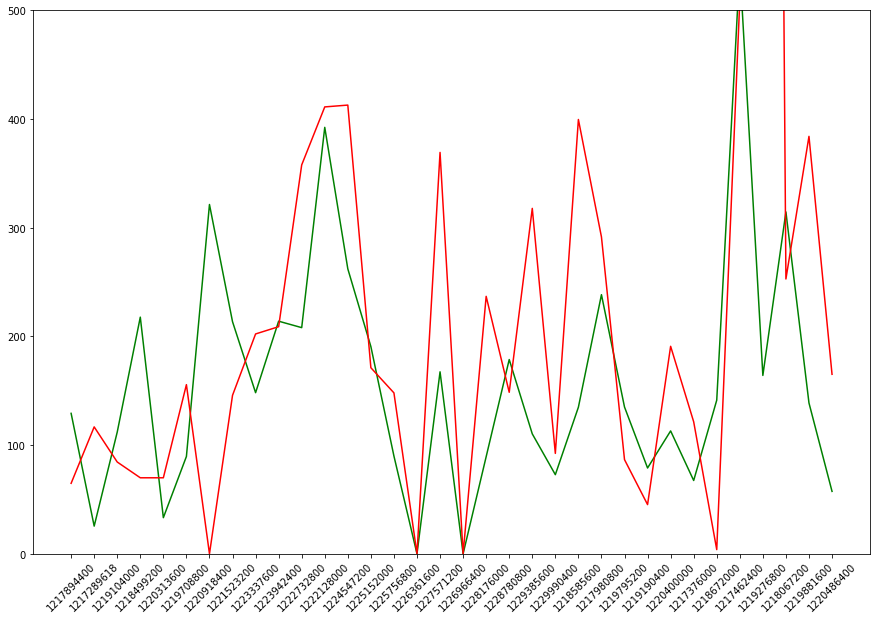

In [99]:
plt.figure(figsize=(15,10))

plt.plot(gps, dur_suc, color='g')
plt.plot(gps, dur_fail, color='r')
#plt.xlim(0,25)
plt.ylim(0,500)
plt.xticks(rotation=45)
plt.show()